In [23]:
import os
print (os.getcwd())

/content


In [8]:
import os
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from torch import nn, optim
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
import torch.nn.functional as func
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
%matplotlib inline

In [105]:
df=pd.read_csv("weather.csv")

In [106]:
df.info

<bound method DataFrame.info of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W

In [107]:
df.shape

(145460, 23)

In [108]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [109]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [110]:
df["RainTomorrow"].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [111]:
df = df.fillna(method="backfill").dropna()
missing_values = df.isna().sum()

In [112]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [113]:
df.duplicated().sum()

0

array([[<Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'MinTemp'}>],
       [<Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'WindSpeed9am'}>]], dtype=object)

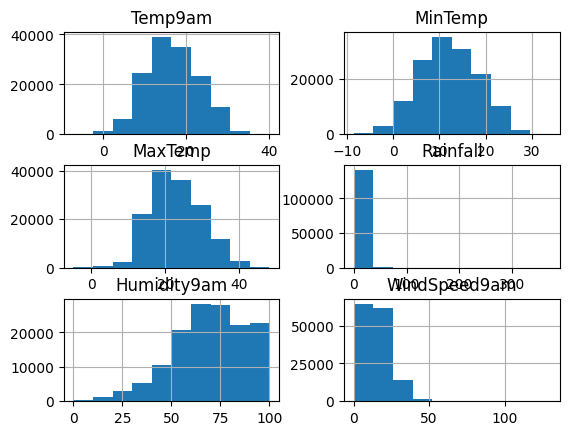

In [114]:
numerical = ['Temp9am', 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'WindSpeed9am']
df[numerical].hist()

In [115]:
df[numerical].describe()

,Temp9am,MinTemp,MaxTemp,Rainfall,Humidity9am,WindSpeed9am
count,142303.000000,142303.000000,142303.000000,142303.000000,142303.000000,142303.000000
mean,16.802724,12.082433,22.991259,2.503727,69.252496,14.019550
std,6.413842,6.322760,6.991731,8.759663,18.861281,8.950355
min,-7.200000,-8.500000,-4.800000,0.000000,0.000000,0.000000
25%,12.200000,7.600000,17.800000,0.000000,57.000000,7.000000
50%,16.500000,11.900000,22.400000,0.000000,70.000000,13.000000
75%,21.300000,16.700000,27.900000,0.800000,83.000000,19.000000
max,40.200000,33.900000,48.100000,371.000000,100.000000,130.000000


In [116]:
df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

In [117]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [118]:
le = preprocessing.LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])

In [119]:
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [120]:
X = df[['Temp9am', 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'WindSpeed9am', 'RainToday', 'Location', 'Year', 'Month', 'Day']]
y = df[['RainTomorrow']]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


In [122]:
from imblearn.over_sampling import ADASYN
adasyn=ADASYN(sampling_strategy="minority",random_state=42)

In [123]:
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)


In [124]:
y_train_resampled.value_counts()

RainTomorrow
1               89552
0               87163
dtype: int64

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [126]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [127]:
y_train_resampled = y_train_resampled.to_numpy(dtype=np.float32)

y_test = y_test.to_numpy(dtype=np.float32)

X_train = torch.from_numpy(X_train_scaled).float()
y_train = torch.from_numpy(y_train_resampled).float()
X_test = torch.from_numpy(X_test_scaled).float()
y_test = torch.from_numpy(y_test).float()

In [128]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


class ImprovedBinaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_prob):
        super(ImprovedBinaryClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out

# Hyperparameters
input_size = X_train.shape[1]
hidden_size = 128
dropout_prob = 0.5
learning_rate = 0.001
weight_decay = 0.001
num_epochs = 20


train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


best_accuracy = 0
best_model_state = None

for hidden_size in [64, 128, 256]:
    for dropout_prob in [0.3, 0.5, 0.7]:

        model = ImprovedBinaryClassifier(input_size, hidden_size, dropout_prob)


        criterion = nn.BCEWithLogitsLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)


        for epoch in range(num_epochs):
            model.train()
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels.view(-1, 1).float())
                loss.backward()
                optimizer.step()


            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            predictions = torch.sigmoid(test_outputs)
            predicted_labels = (predictions >= 0.5).float()
            accuracy = torch.mean((predicted_labels == y_test.view(-1, 1).float()).float()) * 100

            print(f'Test Accuracy: {accuracy.item():.2f}%')


        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_state = model.state_dict()


if best_model_state is not None:
    torch.save(best_model_state, 'best_binary_classifier.ckpt')


Epoch [1/20], Loss: 0.6428
Epoch [2/20], Loss: 0.6809
Epoch [3/20], Loss: 0.4800
Epoch [4/20], Loss: 0.4951
Epoch [5/20], Loss: 0.7787
Epoch [6/20], Loss: 0.5610
Epoch [7/20], Loss: 0.5702
Epoch [8/20], Loss: 0.8712
Epoch [9/20], Loss: 0.6140
Epoch [10/20], Loss: 0.4170
Epoch [11/20], Loss: 0.3104
Epoch [12/20], Loss: 0.7214
Epoch [13/20], Loss: 0.6240
Epoch [14/20], Loss: 0.5078
Epoch [15/20], Loss: 0.4740
Epoch [16/20], Loss: 0.6956
Epoch [17/20], Loss: 0.5958
Epoch [18/20], Loss: 0.4466
Epoch [19/20], Loss: 0.5664
Epoch [20/20], Loss: 0.5674
Test Accuracy: 70.33%
Epoch [1/20], Loss: 0.5560
Epoch [2/20], Loss: 0.7190
Epoch [3/20], Loss: 0.6544
Epoch [4/20], Loss: 0.5340
Epoch [5/20], Loss: 0.8354
Epoch [6/20], Loss: 0.6170
Epoch [7/20], Loss: 0.5597
Epoch [8/20], Loss: 0.5911
Epoch [9/20], Loss: 0.4495
Epoch [10/20], Loss: 0.6455
Epoch [11/20], Loss: 0.6352
Epoch [12/20], Loss: 0.4997
Epoch [13/20], Loss: 0.7902
Epoch [14/20], Loss: 0.5835
Epoch [15/20], Loss: 0.4845
Epoch [16/20], L

In [129]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score

accuracy = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
report = classification_report(y_test, predicted_labels)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Recall: {recall:.2f}')
print('Classification Report:')
print(report)


Accuracy: 0.70
F1 Score: 0.53
Recall: 0.72
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.69      0.78     21791
         1.0       0.41      0.72      0.53      6670

    accuracy                           0.70     28461
   macro avg       0.65      0.70      0.65     28461
weighted avg       0.78      0.70      0.72     28461

